### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

### Importing Data

In [ ]:
df=pd.read_csv("/content/h1n1_vaccine_prediction.csv")

In [ ]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

Dropping Unique_id because it will help in nothing

In [ ]:
df.drop(['unique_id'],axis=1,inplace=True)

Frequency of null values in each columns

<Axes: >

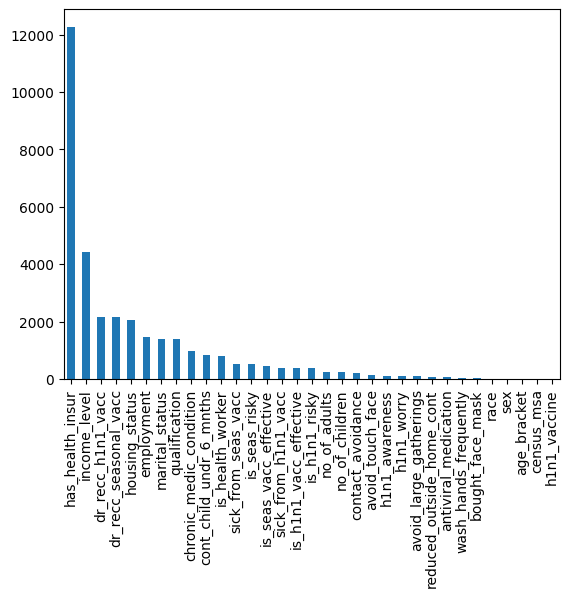

In [ ]:
df.isna().sum().sort_values(ascending=False).plot(kind='bar')

Dropping the below columns as this might not affect our prediction

In [ ]:
df.drop(['race','sex','income_level','housing_status','census_msa'],axis=1, inplace=True)

### Missing value replacement with mode

In [ ]:


for col in df.columns:
    if df[col].isna().sum()>0:
        df[col].fillna(df[col].mode()[0],inplace=True)

In [ ]:
df.isna().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
marital_status               0
employment                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [ ]:
obj=df.select_dtypes(object).columns

Encoding categorical features with get_dummies method

In [ ]:
df=pd.get_dummies(df,columns=obj)

In [ ]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_12 Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,marital_status_Married,marital_status_Not Married,employment_Employed,employment_Not in Labor Force,employment_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,False,False,False,True,False,False,True,False,False,False,True,False,True,False
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,False,True,False,False,False,True,False,False,False,False,True,True,False,False
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,True,False,False,False,False,False,False,True,False,False,True,True,False,False
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,False,False,False,False,True,True,False,False,False,False,True,False,True,False
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,False,False,True,False,False,False,False,False,True,True,False,True,False,False


In [ ]:
df.shape

(26707, 38)

### Visualizations

<Axes: ylabel='count'>

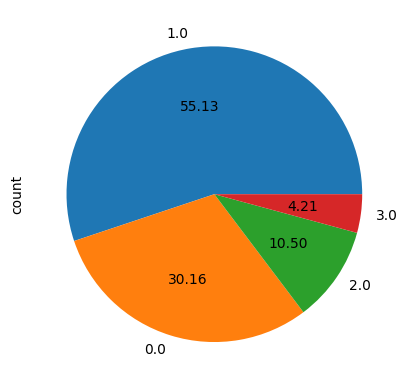

In [ ]:
df['no_of_adults'].value_counts().plot(kind='pie',autopct='%.2f')

About 50% has only 1 adult in their house

<Axes: title={'center': 'Consuming anti-viral medication'}, xlabel='antiviral_medication'>

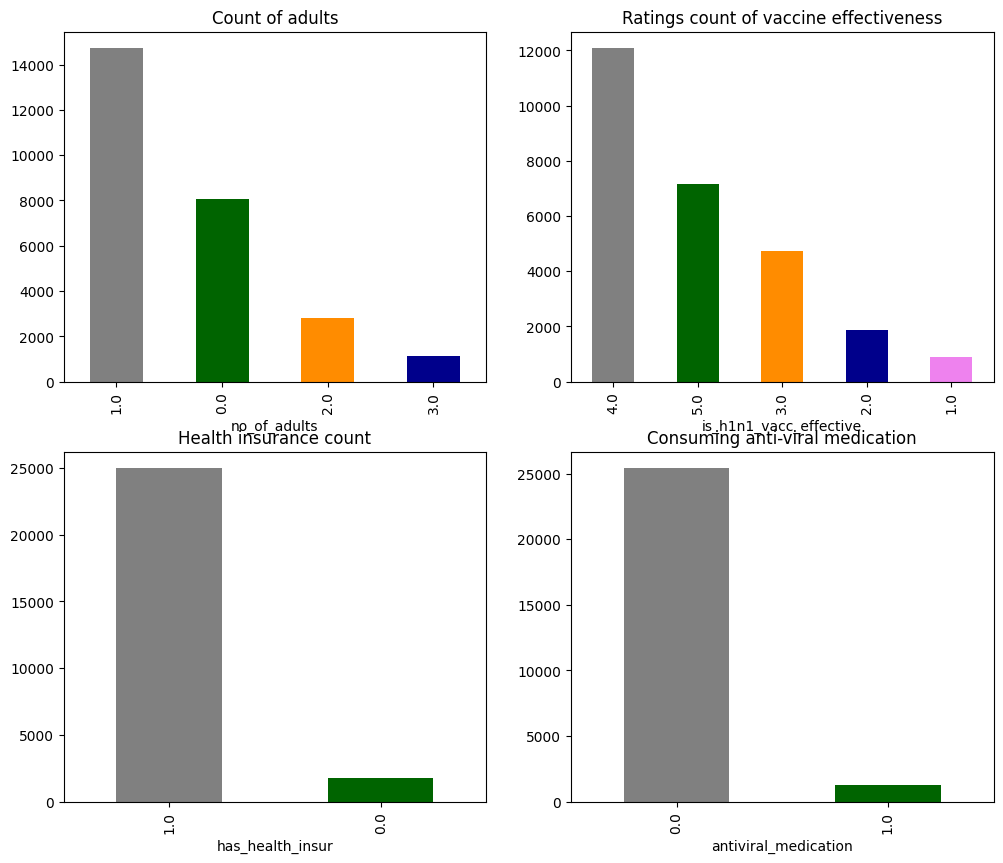

In [ ]:

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('Count of adults')
df['no_of_adults'].value_counts().plot(kind='bar',color=['Gray','DarkGreen','DarkOrange','DarkBlue'])
plt.subplot(2,2,2)
plt.title('Ratings count of vaccine effectiveness')
df['is_h1n1_vacc_effective'].value_counts().plot(kind='bar',color=['Gray','DarkGreen','DarkOrange','DarkBlue','violet'])
plt.subplot(2,2,3)
plt.title('Health insurance count')
df['has_health_insur'].value_counts().plot(kind='bar',color=['Gray','DarkGreen'])
plt.subplot(2,2,4)
plt.title('Consuming anti-viral medication')
df['antiviral_medication'].value_counts().plot(kind='bar',color=['Gray','DarkGreen'])


<Axes: xlabel='is_health_worker'>

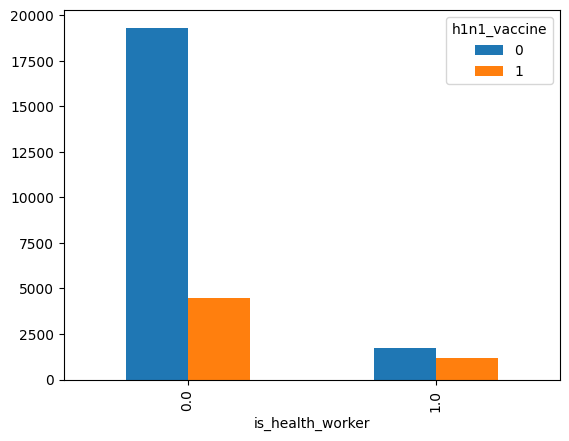

In [ ]:
pd.crosstab(df.is_health_worker,df.h1n1_vaccine).plot(kind='bar')

We can see that mostly all health worker has took the h1n1 vaccine

About 40% of the married guys have took the vaccine

<Axes: xlabel='h1n1_worry'>

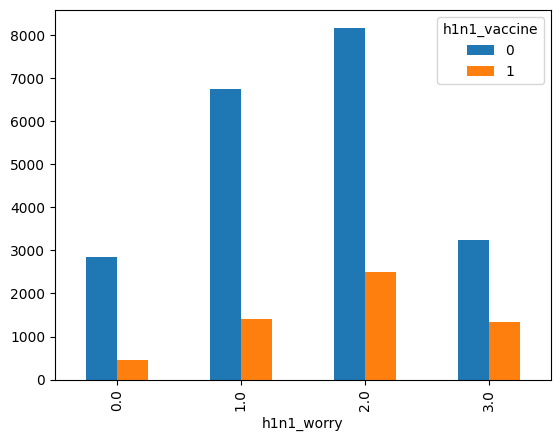

In [ ]:
pd.crosstab(df.h1n1_worry,df.h1n1_vaccine).plot(kind='bar')

People who doesn't have the fear of h1n1 have took the vaccine in a very small fraction, whereas 50% of people who has worry about h1n1, have took the vaccine.

<Axes: xlabel='h1n1_worry'>

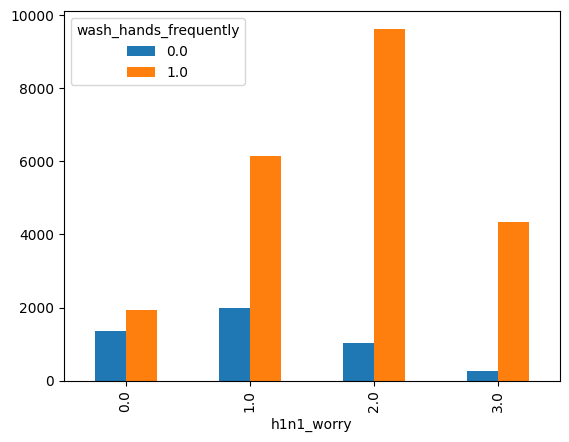

In [ ]:
pd.crosstab(df.h1n1_worry,df.wash_hands_frequently).plot(kind='bar')

We can interpret that, people who wash their hands frequently have less worry about the h1n1, whereas about 80% people who doesn't wash their hands so frequently have worry about the virus.

### Checking whether target variable is balanced

<Axes: xlabel='h1n1_vaccine'>

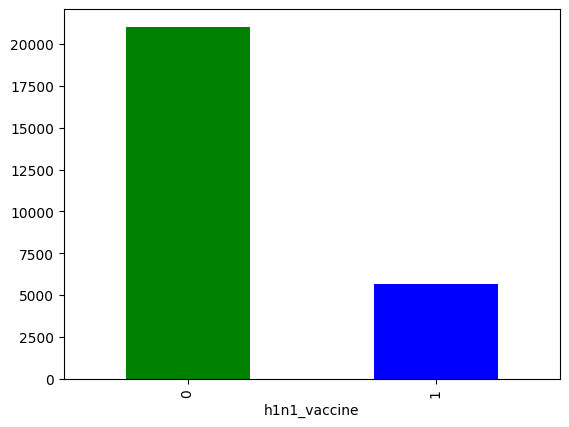

In [ ]:
df['h1n1_vaccine'].value_counts().plot(kind='bar',color=['green','blue'])

Target variable is imbalanced. As this may lead to mis-classification, we are using SMOTE to upsample it.

In [ ]:
x=df.drop(['h1n1_vaccine'],axis=1)

In [ ]:
y=df['h1n1_vaccine']

In [ ]:

oversample=SMOTE()
xsmote,ysmote=oversample.fit_resample(x,y)

In [ ]:
xsmote.shape

(42066, 37)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(xsmote,ysmote,random_state=123,test_size=0.2)

### Pre-defined function

In [ ]:
def report(actual,pred):
    acc_score=accuracy_score(actual,pred)
    con_mat=confusion_matrix(actual,pred)
    class_rep=classification_report(actual,pred)
    print("Accuracy of model is", round((acc_score*100),2),'%')
    print('\n ',con_mat)
    print('\n',class_rep)

### Logistic Regression

In [ ]:
log=LogisticRegression()
log.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
preds_train=log.predict(xtrain)
pred_test=log.predict(xtest)

In [ ]:
report (ytrain,preds_train)
report(ytest,pred_test)

Accuracy of model is 83.75 %

  [[14875  1993]
 [ 3474 13310]]

               precision    recall  f1-score   support

           0       0.81      0.88      0.84     16868
           1       0.87      0.79      0.83     16784

    accuracy                           0.84     33652
   macro avg       0.84      0.84      0.84     33652
weighted avg       0.84      0.84      0.84     33652

Accuracy of model is 84.01 %

  [[3681  484]
 [ 861 3388]]

               precision    recall  f1-score   support

           0       0.81      0.88      0.85      4165
           1       0.88      0.80      0.83      4249

    accuracy                           0.84      8414
   macro avg       0.84      0.84      0.84      8414
weighted avg       0.84      0.84      0.84      8414



### Decision Tree

In [ ]:
dt=DecisionTreeClassifier(max_depth=11)
dt.fit(xtrain,ytrain)
train_dt=dt.predict(xtrain)
test_dt=dt.predict(xtest)
report(ytrain,train_dt)
report(ytest,test_dt)

Accuracy of model is 86.67 %

  [[15140  1728]
 [ 2758 14026]]

               precision    recall  f1-score   support

           0       0.85      0.90      0.87     16868
           1       0.89      0.84      0.86     16784

    accuracy                           0.87     33652
   macro avg       0.87      0.87      0.87     33652
weighted avg       0.87      0.87      0.87     33652

Accuracy of model is 84.8 %

  [[3653  512]
 [ 767 3482]]

               precision    recall  f1-score   support

           0       0.83      0.88      0.85      4165
           1       0.87      0.82      0.84      4249

    accuracy                           0.85      8414
   macro avg       0.85      0.85      0.85      8414
weighted avg       0.85      0.85      0.85      8414



### Random Forest

In [ ]:
rf=RandomForestClassifier(n_estimators=130,max_depth=12,min_samples_split=8)
rf.fit(xtrain,ytrain)
train_rf=rf.predict(xtrain)
test_rf=rf.predict(xtest)
report(ytrain,train_rf)
report(ytest,test_rf)

Accuracy of model is 90.76 %

  [[15615  1253]
 [ 1856 14928]]

               precision    recall  f1-score   support

           0       0.89      0.93      0.91     16868
           1       0.92      0.89      0.91     16784

    accuracy                           0.91     33652
   macro avg       0.91      0.91      0.91     33652
weighted avg       0.91      0.91      0.91     33652

Accuracy of model is 88.51 %

  [[3766  399]
 [ 568 3681]]

               precision    recall  f1-score   support

           0       0.87      0.90      0.89      4165
           1       0.90      0.87      0.88      4249

    accuracy                           0.89      8414
   macro avg       0.89      0.89      0.89      8414
weighted avg       0.89      0.89      0.89      8414



#Bagging classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
base_estimator = DecisionTreeClassifier(max_depth=12, min_samples_split=8)


In [ ]:

bagging_clf = BaggingClassifier(
    base_estimator=base_estimator,
    n_estimators=130,
    max_samples=1.0,
    max_features=1.0,
    random_state=None
)


In [ ]:

bagging_clf.fit(xtrain, ytrain)
test_bagging = bagging_clf.predict(xtest)
accuracy = accuracy_score(ytest, test_bagging) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 87.64%


#GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

In [ ]:

# Fit the model on the training data
gb_clf.fit(xtrain, ytrain)


GradientBoostingClassifier(random_state=42)

In [ ]:

# Predictions on the test set
test_preds = gb_clf.predict(xtest)

# Calculate test accuracy and convert it to percentage
accuracy = accuracy_score(ytest, test_preds) * 100

# Print test accuracy
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 88.97%


#AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Define the AdaBoost model
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

In [ ]:

ada_clf.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=42)

In [ ]:

test_preds = ada_clf.predict(xtest)
accuracy = accuracy_score(ytest, test_preds) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 87.12%


[Text(0, 0, '83.75')]

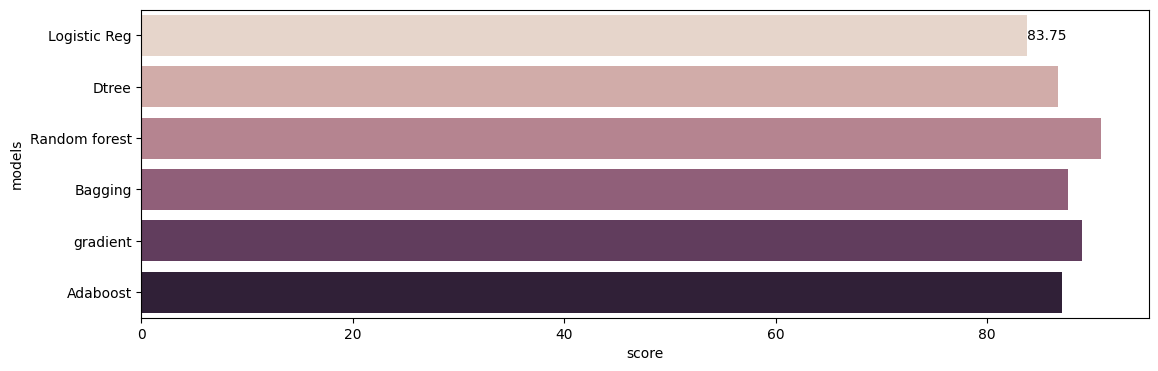

In [ ]:
acc=pd.DataFrame({'models':['Logistic Reg','Dtree','Random forest','Bagging','gradient','Adaboost'],
                  'score':[83.75,86.67,90.76,87.64,88.97,87.12]})
plt.figure(figsize=(13,4))
ax=sns.barplot(x='score',y='models',data=acc,palette='ch:.120',errwidth=0)
ax.bar_label(ax.containers[0])